# OSEMN Exercises

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

1\. Create a random list of number and then save it to a text file named "simple_data.txt"

In [2]:
a = np.random.rand(100)
np.savetxt("simple_data.txt", a)

2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [3]:
a = np.random.rand(5,5)
np.savetxt("data.txt", a)

3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [42]:
data = np.loadtxt("data.txt")
np.savetxt("data.csv", data, delimiter=',')

4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [8]:
with open("credit_card.dat", 'r') as file:
    c = file.read()
    content = []
    for i in c:
        content.append(i)
        if i == '\n':
            content.append(0)
    content = np.array(content)
    digit = ""
    numbers = []
    line = ""
    for i in range(0, len(content), 6):
        if np.any(content[i:i+6]=='\n')==0:
            for j in content[i:i+6]:
                digit += j
            num = int(digit, 2)
            line += chr(num)
            digit = ""
        else:
            if line != "":
                numbers.append(line)
                line = ""

print(numbers)

['7648 5673 3775 2271', '3257 8247 3354 2266', '2722 0001 4011 6652', '0661 3063 3742 3150', '0432 1608 1462 4742', '5827 2027 8785 7303', '5774 8528 2087 1117', '8140 1210 6352 2845', '5764 1133 7301 7100', '6456 1737 4126 6726', '1228 8631 7382 0000', '7051 0160 5374 3166', '0618 3587 1630 6376', '1545 5454 7444 5636', '6735 3116 3202 6834', '7287 5011 1547 8413', '7033 2607 3328 4200', '2568 5244 1874 5024', '1684 2253 7570 7118', '0672 2576 0575 6631', '6332 8353 8787 1340', '1813 3361 1175 4211', '2477 6450 8840 2368', '5512 3505 2563 1326', '3083 7882 0621 0025', '4521 5148 8045 0334', '7563 3654 8713 5787', '8324 2664 0476 5561', '0565 2504 7168 3510', '5107 5507 1767 0738', '2462 1821 2448 1443', '2788 0638 6861 6554', '5851 5873 5474 0547', '0670 1004 4013 2655', '5874 5506 3048 0806', '2805 5401 8462 1260', '5083 8406 6310 1862', '1076 1445 3013 2266', '8440 4804 4844 5277', '4758 6141 0686 1387', '7586 0675 0315 2568', '2544 1258 7432 5165', '3474 5023 4434 5626', '1410 0270

5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [51]:
import json
import csv

credit = json.load(open("user_data.json"))
filtered = []
for i in range(len(credit)):
    if credit[i]['CreditCardType']=="American Express":
        filtered.append(credit[i])

csvform = []
for i in range(len(filtered)):
    csvform.append(filtered[i]['ID'])
    #csvform.append(',')
    csvform.append(filtered[i]['JobTitle'])
    #csvform.append(',')
    csvform.append(filtered[i]['EmailAddress'])
    #csvform.append(',')
    csvform.append(filtered[i]['FirstNameLastName'])
    #csvform.append(',')
    csvform.append(filtered[i]['CreditCard'])
    #csvform.append(',')
    csvform.append(filtered[i]['CreditCardType'])
    #csvform.append(',')
    
csvform = np.array(csvform)
csvform = csvform.reshape(len(filtered),6)
pd.DataFrame(csvform).to_csv("credit.csv", header=None, index=None)

6\. Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Decribe wath you see


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdf57d8350>]],
      dtype=object)

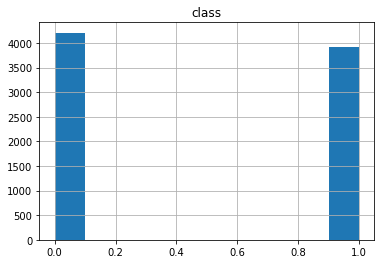

In [11]:
mush = pd.read_csv("https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1")
mush.hist("class")
# the possible values for the class field are only 0 or 1

7\. Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

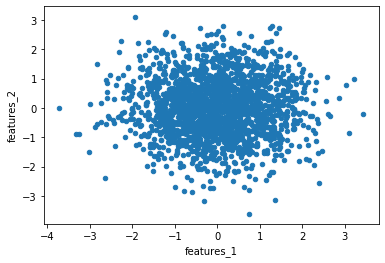

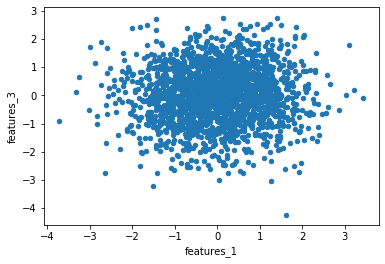

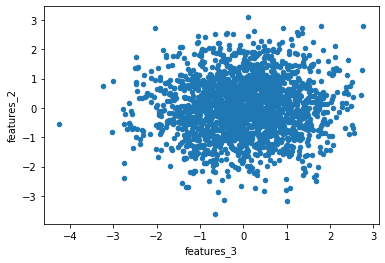

In [10]:
url ='https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1'
reg = pd.read_csv(url)

reg.plot.scatter("features_1", "features_2")
reg.plot.scatter("features_1", "features_3")
reg.plot.scatter("features_3", "features_2")

8\. Load the same file of point 6, and convert the file to json with Pandas.

In [ ]:
mush = pd.read_csv("https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1")
mush.to_json("j_mushrooms.json")